# Exploratory Data Analysis

## Libraries and Data Loading

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df1 = pd.read_csv('df1.csv',index_col = 0)
df1.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,Jan,0
3,2018-01-01,United Airlines,Fort Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,Jan,0
4,2018-01-01,United Airlines,Chicago,Albany,2,20.0,13.0,2,2,10.0,2,14.0,112.0,106.0,83.0,723.0,1,1,Jan,1


In [3]:
df1.shape

(7071817, 20)

In [4]:
df1.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
DAY                    0
MONTH                  0
MONTH_AB               0
FLIGHT_STATUS          0
dtype: int64

### Univariate Analysis  

### Total Number of Flights per Airline

In [13]:
df1['OP_CARRIER'].value_counts()

Southwest Airlines    1331609
Delta Airlines         943837
American Airlines      899527
SkyWest Airlines       760796
United Airlines        614915
Republic Airways       305251
JetBlue Airways        297758
Envoy Air              284497
PSA Airlines           265784
Alaska Airlines        242979
Endeavor Air           231815
Mesa Airline           209094
ExpressJet             196583
Spirit Airlines        174129
Frontier Airlines      117523
Allegiant Air           95192
Hawaiian Airlines       83375
Virgin America          17153
Name: OP_CARRIER, dtype: int64

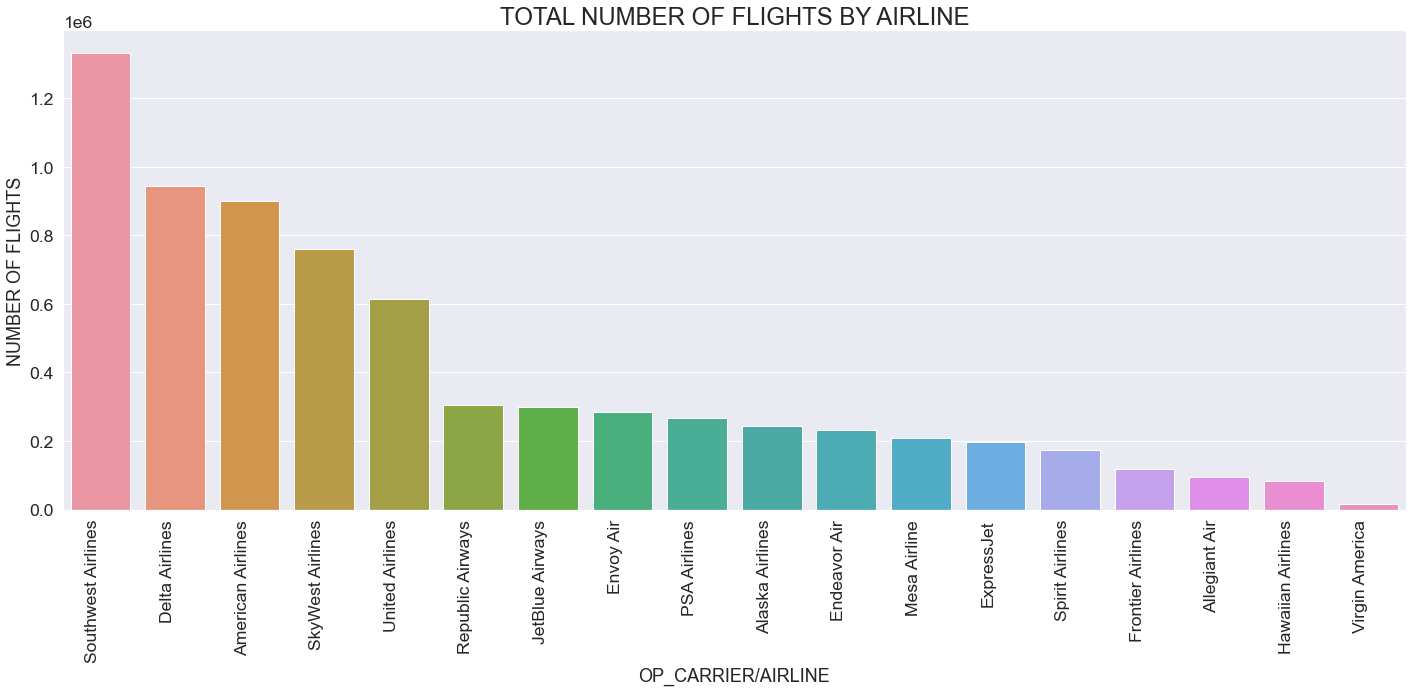

In [14]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['OP_CARRIER'], data=df1, order=df1['OP_CARRIER'].value_counts().index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('OP_CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

The airlines with the most domestic flights in the US:
1. Southwest Airlines
2. Delta Airlines
3. American Airlines
4. SkyWest Airlines
5. United Airlines

### Number of Delayed Flights by Airline

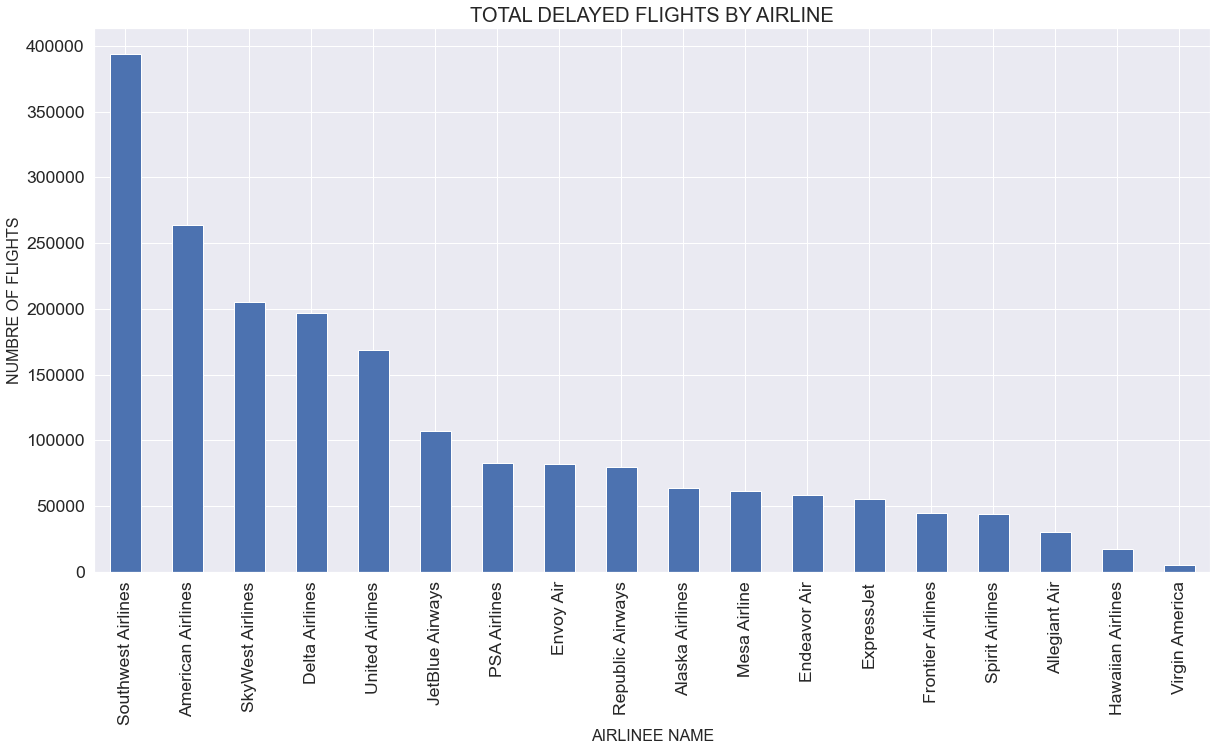

In [17]:
plt.figure(figsize=(20, 10))
df1.groupby('OP_CARRIER').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

From this plot we can now extract the top 5 airlines with the most delayed flights, which are:

1. Southwest Airlines
2. American Airlines
3. SkyWest Airlines
4. Delta Airlines
5. United Airlines

### Percentage of delayed flights per airline

From above two derivations we can derive percentage of delayed flights per airline, This can give us correct measeure of delay per airline 

In [20]:
df1.FLIGHT_STATUS.value_counts(normalize=True)

0    0.722685
1    0.277315
Name: FLIGHT_STATUS, dtype: float64

lets first remember that the 0 represents flights that arrive on time, and the 1 the delayed flights, therefore, 27.7% of flights are delayed and that is a rather high percentage, meaning that around 1 out of every 3 flights is normally delayed.

In [25]:
temp = df1[['OP_CARRIER', 'FLIGHT_STATUS']]
test_1 = temp.groupby(['OP_CARRIER']).sum().reset_index()
test_2 = df1.OP_CARRIER.value_counts().rename_axis('OP_CARRIER').reset_index(name='TOTAL_FLIGHTS')
df_fp = pd.merge(test_1, test_2, on='OP_CARRIER')

In [26]:
#Create a new column that will represent the percentage of delay flights
df_fp['PERCENTAGE_DELAYED'] = round((df_fp['FLIGHT_STATUS']*100)/df_fp['TOTAL_FLIGHTS'], 2)
df_fp.rename({'FLIGHT_STATUS': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)
df_fp

,OP_CARRIER,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
0,Alaska Airlines,63945,242979,26.32
1,Allegiant Air,29904,95192,31.41
2,American Airlines,263915,899527,29.34
3,Delta Airlines,196674,943837,20.84
4,Endeavor Air,58644,231815,25.30
5,Envoy Air,82352,284497,28.95
6,ExpressJet,55700,196583,28.33
7,Frontier Airlines,44524,117523,37.89
8,Hawaiian Airlines,17128,83375,20.54
9,JetBlue Airways,106792,297758,35.87


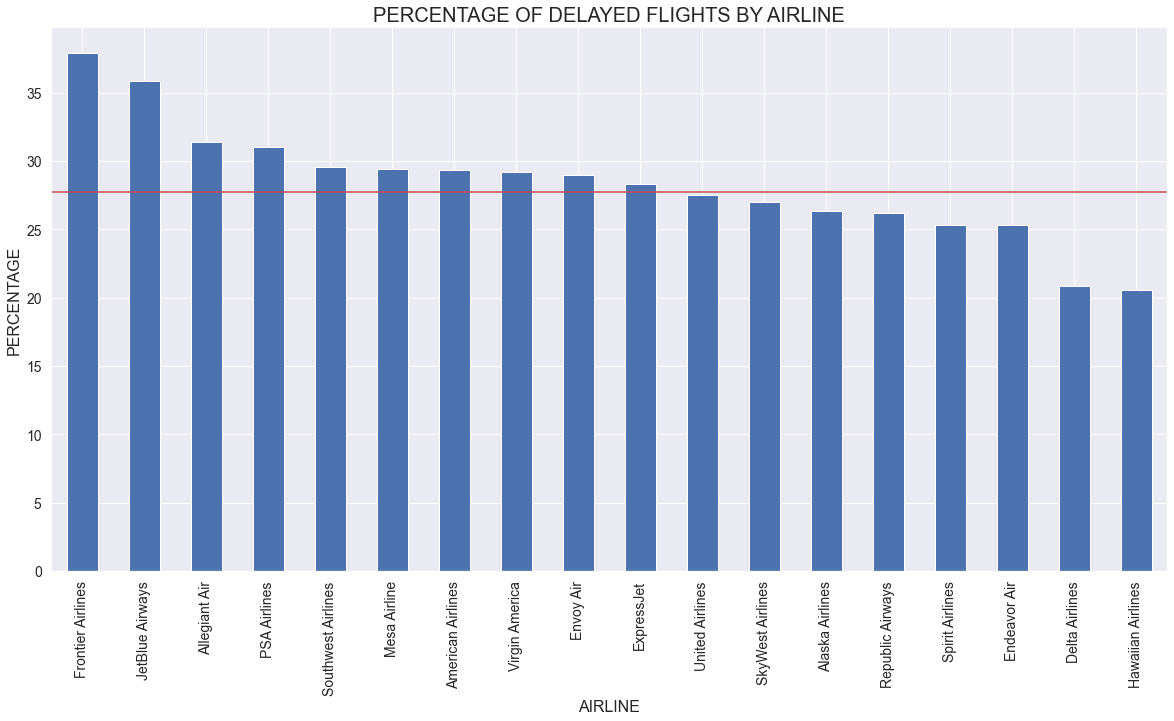

In [30]:
plt.figure(figsize=(20, 10))
df_fp.groupby('OP_CARRIER').PERCENTAGE_DELAYED.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=27.73, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

**Observations**

* Hawaiian Airlines	 having least number of flights and also least delayed number of flights and best airline in terms of least delay percentage flights.

* Delta Airlines is the second airline with the highest number of flights, at the same time is the forth with the highest number of delayed flights, but in terms of percentage of delayed flights, it is the airline with the 2nd best percentage at 20.84%. That represents 7% below the threshold.

* Southwest Airlines has the most flights and most delayed flights as well, but as our last plot suggests, it is not the worst, it is the 5th worst and still is above the threshold value by over 2%, so definitely not great compared to Delta Airlines


### Total Minutes Delayed by Airline

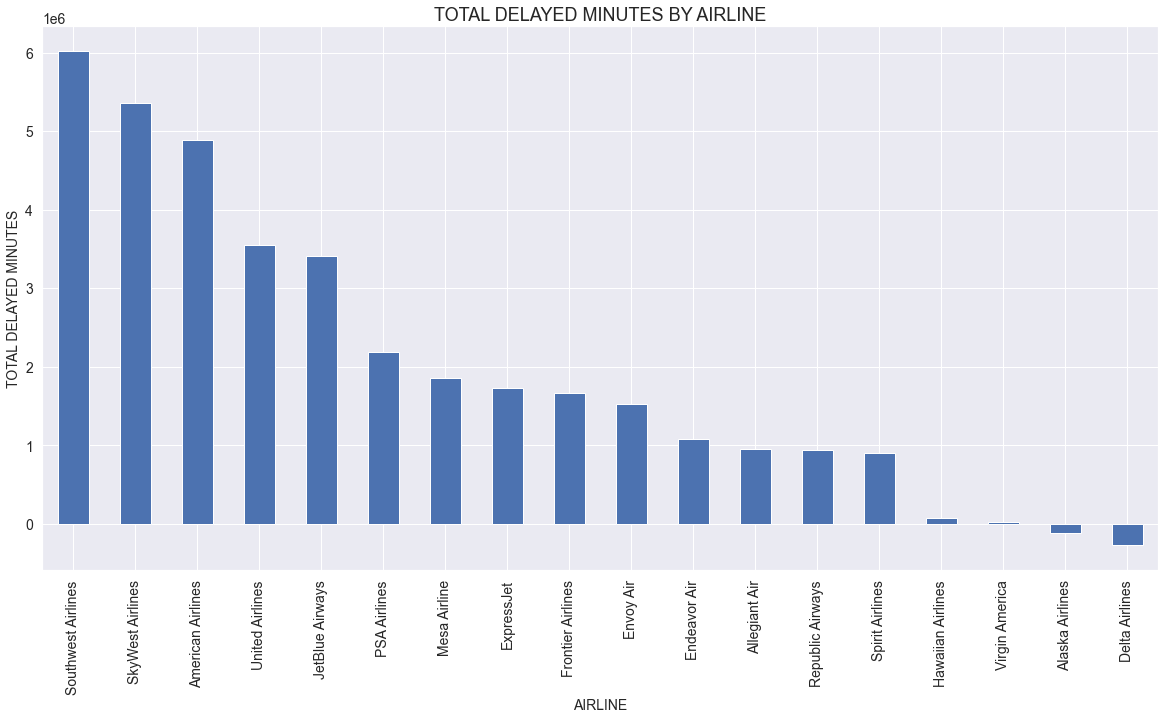

In [31]:
plt.figure(figsize=(20, 10))
df1.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

> The Total number of minutes delayed for Delta, Alaska airlines has negative minutes that is even though it has delayed flights some flights are maintaning the balance by arriving before scheduled time.

### Average Delay Time per Airline'

In [32]:
test_3 = df1[['OP_CARRIER', 'ARR_DELAY']]
test_3 = test_3.groupby(['OP_CARRIER']).mean().reset_index()
test_3.rename({'ARR_DELAY': 'AVG_DELAY'}, axis=1, inplace=True)
test_3 = test_3.sort_values(['AVG_DELAY']).reset_index(drop=True)
test_3

,OP_CARRIER,AVG_DELAY
0,Alaska Airlines,-0.501562
1,Delta Airlines,-0.289825
2,Hawaiian Airlines,0.851310
3,Virgin America,1.727978
4,Republic Airways,3.076668
5,Southwest Airlines,4.519644
6,Endeavor Air,4.658430
7,Spirit Airlines,5.171453
8,Envoy Air,5.357280
9,American Airlines,5.432065


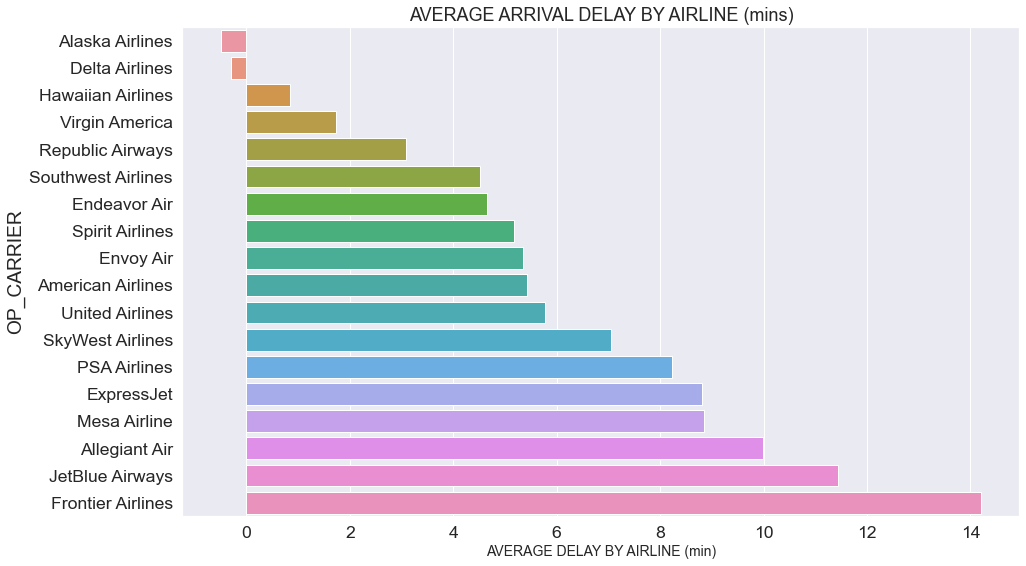

In [33]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='AVG_DELAY', y='OP_CARRIER', data=test_3)
ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18)
ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

Another interesting plot highlighting again Delta Airlines as a top tier airline.

We know that Delta is top 5 in terms of number of flights, also top 5 in delayed flights. This last one because of the number of flights they operate, but when we look at other values such as the percentage or delayed flights, they are the best, also with the total minutes delayed, they are in negative, and now with the average delayed minutes, they are again in negative. So a quick conclusion here is that Delta Airlines even when they have a lot of delayed flights, the delays are minimal (in average negative)

### 20 Most Common Destination (Cities)

In [35]:
df1['DEST'].nunique()

345

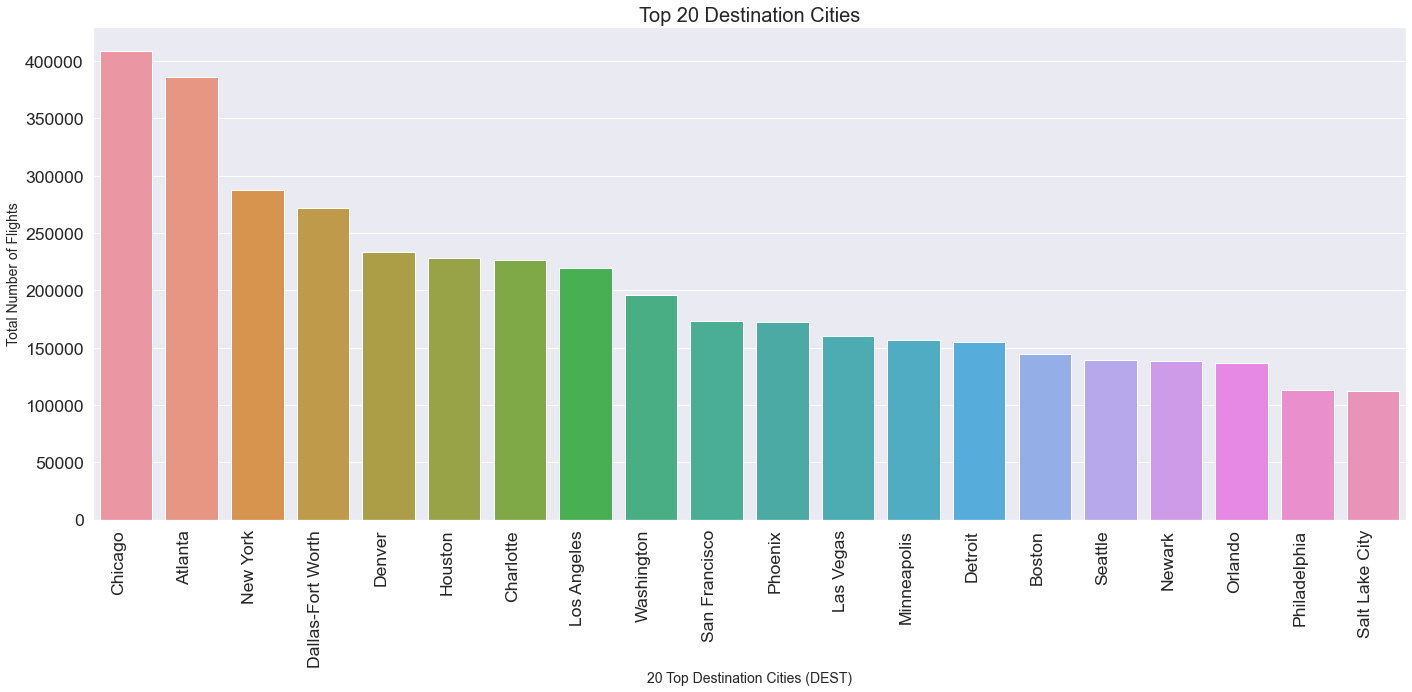

In [36]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['DEST'], data=df1, order=df1['DEST'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 20 Destination Cities', fontsize=20)
plt.xlabel('20 Top Destination Cities (DEST)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()

### Worse & Best months to travel based on flight delays

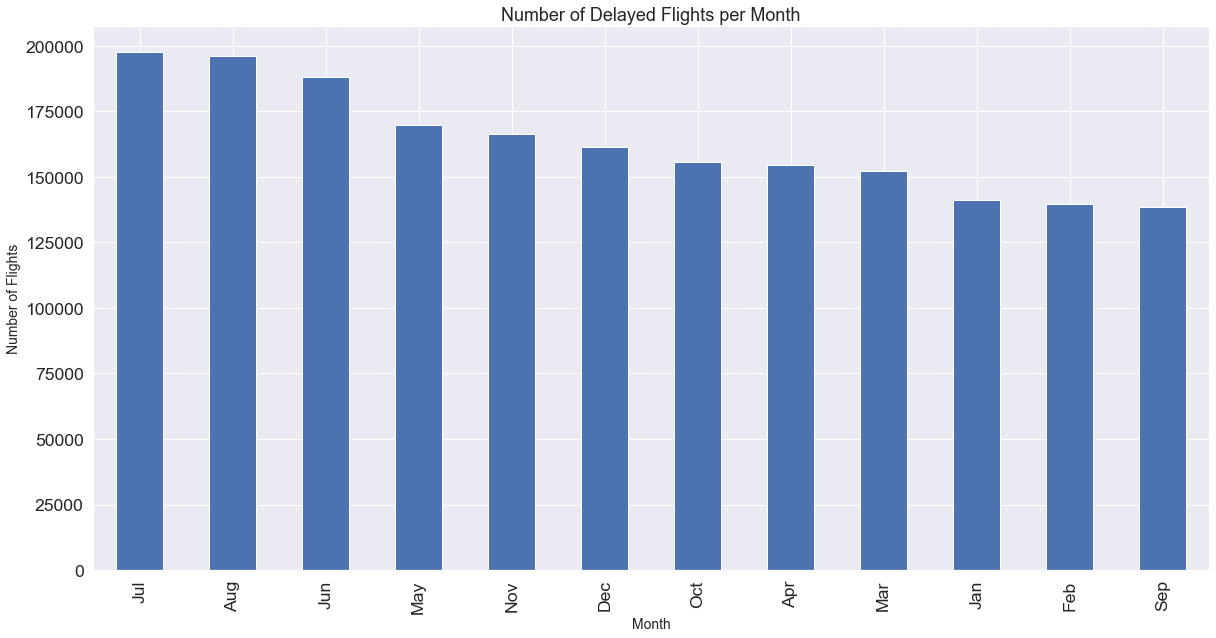

In [37]:
plt.figure(figsize=(20, 10))
df1.groupby('MONTH_AB').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

> July, August and June are the months with most delays and jan, feb and sep are months with least delays 

### Impact of Delays (Departure vs. Arrival Delay)

Here we gonna analyze both dep_delay and arr_delay where we compare airlines with their mean delay and mean arrival.

This plot should also confirm the theory that some airlines when having a delay from their departure try to compensate by reducing their air time. At this point that is just a theory so we will see.

Here We will overlay the ARR_DELAY over the DEP_DELAY

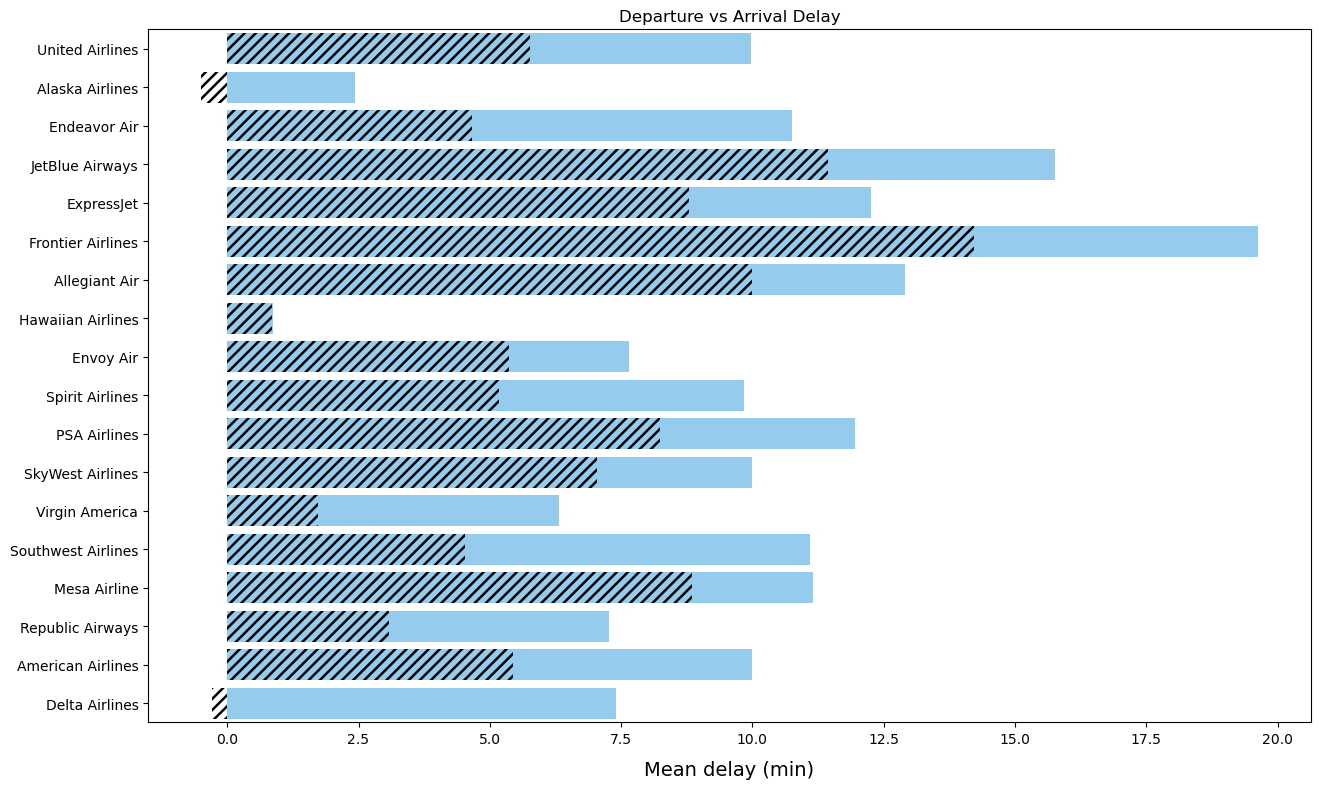

In [41]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="DEP_DELAY", y="OP_CARRIER", data=df1, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARR_DELAY", y="OP_CARRIER", data=df1, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (min)', fontsize=14, labelpad=10);

* ***The departure delay (DEP_DELAY) is the light blue color, whereas the arrival delay (ARR_DELAY) is the dashed line.***


* The results of the plot are quite interesting suggesting that the ARR_DELAYS are generally lower than the DEP_DELAYS, and as mentioned above, this suggests that the airlines try to adjust their flight speed to try and compensate for the late departure and reduce the ARR_DELAY.


* Another interesting piece of information is related to Delta Airlines. Once again, the arrivals are negative. This means that even when they leave late, they are a good airline compensating by reducing the time of the flights to arrive on time or in average, earlier as the plot suggest.

### Most Popular Destination with Average Arrival Delays

In [43]:
test_4 = df1[['DEST', 'ARR_DELAY']]
test_4 = test_4.groupby(['DEST']).mean().reset_index()
test_4.head()

,DEST,ARR_DELAY
0,Aberdeen,3.716621
1,Abilene,5.784016
2,Adak Island,-6.079208
3,Agana,4.039088
4,Aguadilla,14.286742


In [44]:
test_5 = df1.DEST.value_counts().rename_axis('DEST').reset_index(name='FLIGHTS').iloc[0:20]
test_5

,DEST,FLIGHTS
0,Chicago,409000
1,Atlanta,385942
2,New York,287618
3,Dallas-Fort Worth,272075
4,Denver,233410
5,Houston,228018
6,Charlotte,226060
7,Los Angeles,219261
8,Washington,195573
9,San Francisco,173016


In [73]:
test_4_5 = pd.merge(test_5, test_4, on='DEST')
test_4_5.head()

,DEST,FLIGHTS,ARR_DELAY
0,Chicago,409000,7.154714
1,Atlanta,385942,2.921392
2,New York,287618,8.532776
3,Dallas-Fort Worth,272075,6.316821
4,Denver,233410,3.132484


In [68]:
test_4_5.describe()

,FLIGHTS,ARR_DELAY
count,20.000000,20.000000
mean,202896.550000,5.214483
std,82950.738225,3.747363
min,112570.000000,0.665390
25%,142761.000000,2.811116
50%,172487.500000,4.299283
75%,229366.000000,6.923761
max,409000.000000,16.656969


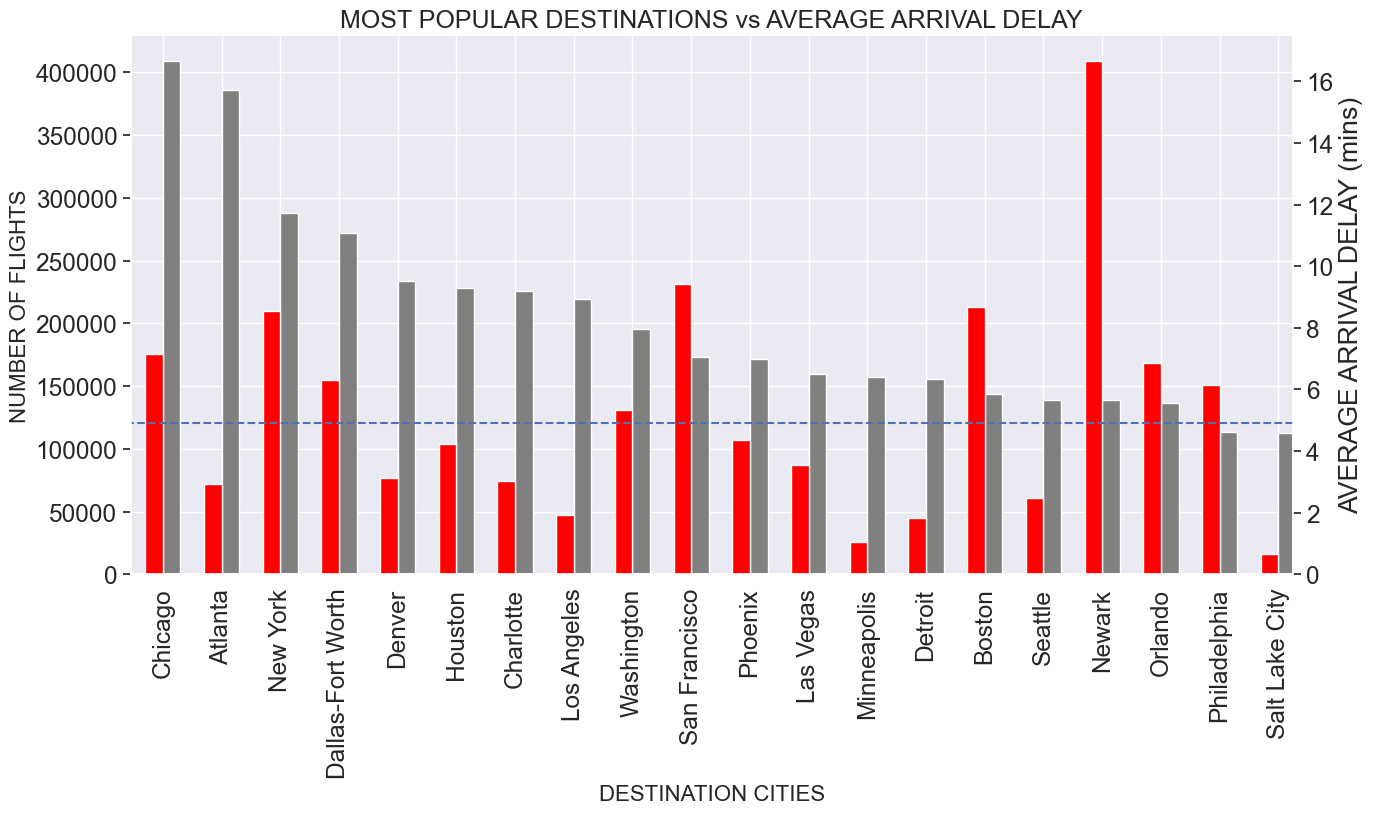

In [72]:

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

test_4_5.FLIGHTS.plot(kind='bar',color='grey',ax=ax, width=width, position=0)
test_4_5.ARR_DELAY.plot(kind='bar',color='red', ax=ax2, width=width, position=1)

plt.hlines(y=4.90, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS vs AVERAGE ARRIVAL DELAY', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE ARRIVAL DELAY (mins)')
ax.set_xlabel('DESTINATION CITIES', fontsize=16)

plt.show()